In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# List of file paths
file_paths = [
    "data/pm_cleaned_and_cst_tz/data_2023-01-25.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-26.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-27.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-28.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-29.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-30.csv",
    "data/pm_cleaned_and_cst_tz/data_2023-01-31.csv",
]
df = pd.read_csv(file_paths[0])
df

,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1,pm0_3,pm0_5,pm1_0,pm2_5,pm5_0,pm10_0
0,2023-01-25T00:00:00.0,113246.0,8853.0,5353.0,226.0,96.0,0.0,0.0,0.094624,0.294354,0.853470,1.043085,1.797159,1.797159,1.797159
1,2023-01-25T00:00:01.0,115488.0,8999.0,5486.0,222.0,97.0,0.0,0.0,0.096497,0.299519,0.872514,1.058411,1.819404,1.819404,1.819404
2,2023-01-25T00:00:02.0,117064.0,9077.0,5593.0,218.0,97.0,0.0,0.0,0.097814,0.302607,0.886799,1.069008,1.830557,1.830557,1.830557
3,2023-01-25T00:00:03.0,117604.0,9132.0,5575.0,213.0,92.0,0.0,0.0,0.098266,0.304297,0.886571,1.065121,1.793462,1.793462,1.793462
4,2023-01-25T00:00:04.0,117853.0,9184.0,5539.0,209.0,88.0,0.0,0.0,0.098473,0.305683,0.884191,1.059200,1.750461,1.750461,1.750461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,2023-01-25T23:59:55.0,528129.0,124780.0,73815.0,6958.0,1748.0,0.0,0.0,0.441284,3.256326,10.965587,16.779488,30.482678,30.482678,30.482678
86396,2023-01-25T23:59:56.0,552487.0,124747.0,73091.0,7115.0,1781.0,0.0,0.0,0.461637,3.275938,10.909578,16.855261,30.816639,30.816639,30.816639
86397,2023-01-25T23:59:57.0,570730.0,123753.0,71518.0,7223.0,1805.0,0.0,0.0,0.476880,3.268761,10.738119,16.773445,30.925206,30.925206,30.925206
86398,2023-01-25T23:59:58.0,561270.0,122356.0,69588.0,7287.0,1821.0,0.0,0.0,0.468976,3.229348,10.497219,16.586308,30.862599,30.862599,30.862599


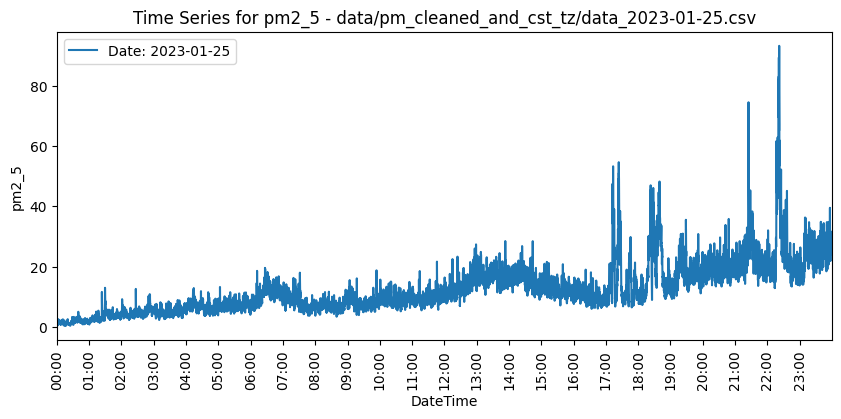

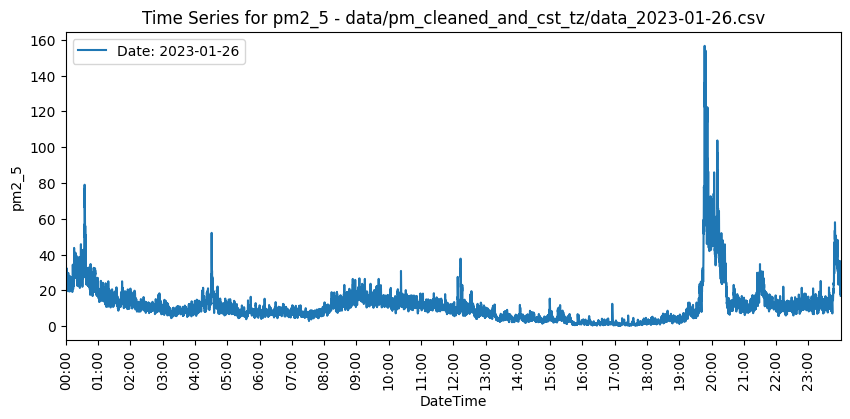

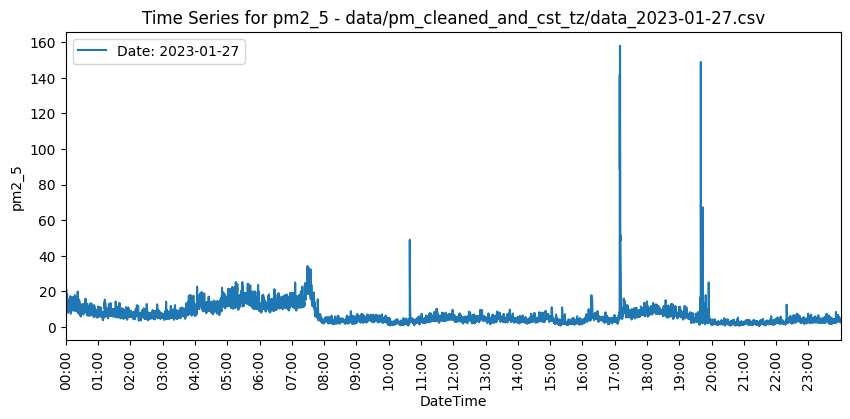

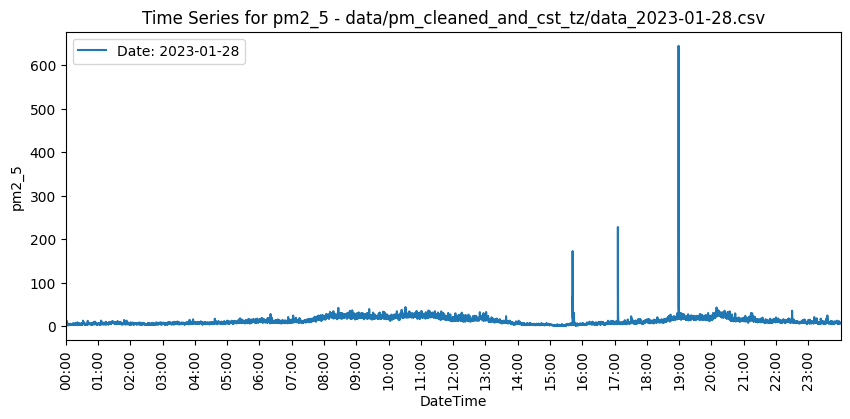

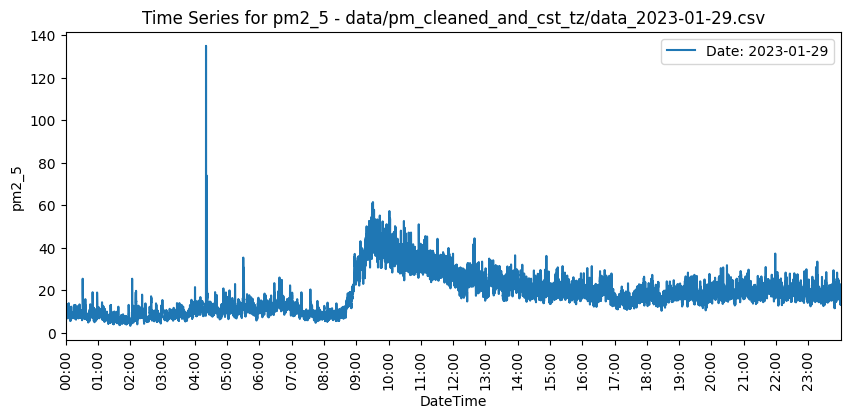

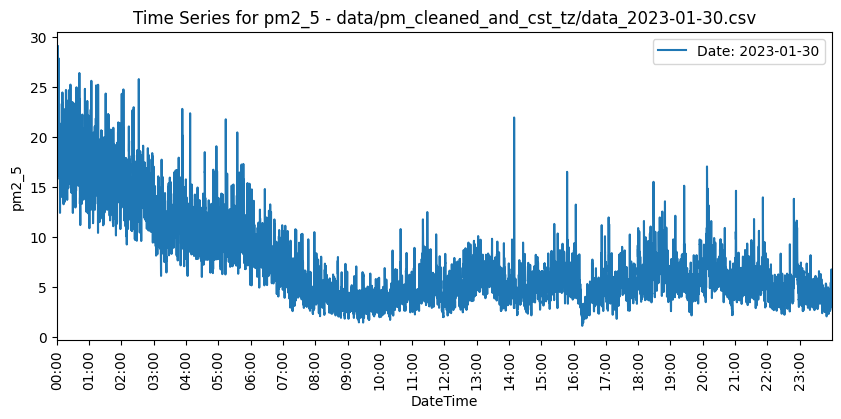

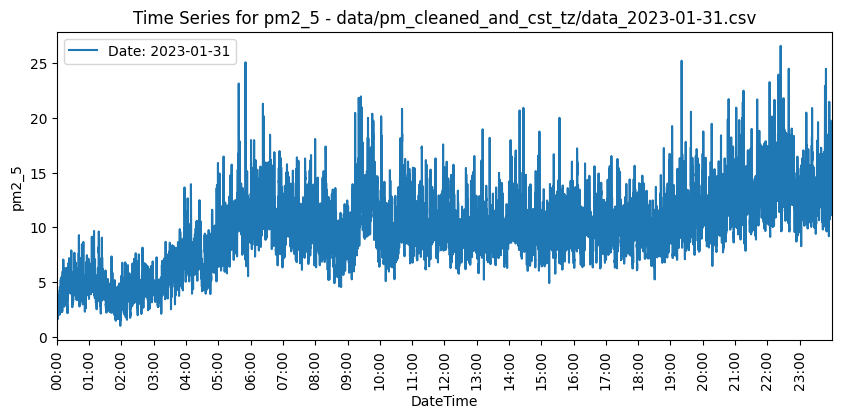

In [29]:
# Plot time series for each day in a separate plot
for file_path in file_paths:
    # Read the DataFrame from the CSV file
    df = pd.read_csv(file_path)

    # Convert the 'dateTime' column to datetime
    df['dateTime'] = pd.to_datetime(df['dateTime'])

    # Extract date from datetime
    df['Date'] = df['dateTime'].dt.date

    # Group by date and plot each day's data
    grouped = df.groupby('Date')
    for date, group in grouped:
        mean_pm2_5 = group['pm2_5'].mean()
        plt.figure(figsize=(10, 4))
        plt.plot(group['dateTime'], group['pm2_5'], label=f'Date: {date}')
                # Format x-axis ticks to show only time
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
        plt.xticks(rotation = 90)
        plt.xlim(group['dateTime'].min(), group['dateTime'].max())
        plt.xlabel('DateTime')
        plt.ylabel('pm2_5')
        plt.title(f'Time Series for pm2_5 - {file_path}')
        plt.legend()
        plt.show()